
<img src="./figures/opencv-delaunay-vornoi-subdiv-example.png">



##  Voronoi diagram 维诺图 和 Delaunay Triangulation 德罗奈三角剖分

### 维诺图

#### 定义
给定平面中的一组点，所有点不共线，维诺图为每个点（生成元）创建多边形区域，使得每个区域中的点到生成元的距离最近。  

#### 特点 
* 每个V多边形内有一个生成元； 
* 每个V多边形内点到该生成元距离短于到其它生成元距离； 
* 多边形边界上的点到生成此边界的生成元距离相等（生成元连线的垂直平分线）； 
* 邻接图形的Voronoi多边形界线以原邻接界线作为子集。

### 德罗奈三角剖分

对点集进行结构化的一个重要的方法就是对这些点进行三角剖分。
#### 定义
Delaunay三角剖分定义为平面上的点集P是一种三角剖分，使得P中没有点严格处于剖分后中任意一个三角形外接圆的内部。

#### 特点
* Delaunay三角剖分与Voronoi图是对偶关系。  
  对于一个维诺图，若任何两个生成元site之间有一条非空边界，那么这两个site之间连接一条边，由此得到的对偶图，就是一个三角剖分。
* 空圆性  
  对于Delaunay剖分中的任何一张face的外接圆必然是空的。 
* 最近邻性  
  任何一条连接于最近邻之间的边都会被Delaunay剖分所采用，因为这里头会存在一个以这条边为直径（弦）的空圆。
* 复杂度  
  在二维平面中，每增加一个点三角形的数目都会大概增加2，边数增加3。可以说在二维上的Delaunay剖分中是一个线性规模的数据结构。但在三维的情况下这两个指标最多会达到平房的量级，更高维的空间的一般结论也会达到2^d量级。
 
 






### 维诺图生成方法

首先生成其对偶元Delaunay三角网，再找出三角网每一三角形的外接圆圆心，最后连接相邻三角形的外接圆圆心，形成以每一个三角形顶点为生成元的多边形网。

步骤：  
（1）离散点自动构建三角网，即构建Delaunay三角网。对离散点和形成的三角形编号，记录每个三角形是由哪三个离散点构成的。   
（2）计算每个三角形的外接圆圆心，并记录之。   
（3）遍历三角形链表，寻找与当前三角形pTri三边共边的相邻三角形TriA，TriB和TriC。   
（4）如果找到，则把寻找到的三角形的外心与pTri的外心连接，存入维诺边链表中。如果找不到，则求出最外边的中垂线射线存入维诺边链表中。   
（5）遍历结束，所有维诺边被找到，根据边画出维诺图。

Delaunay剖分是一种三角剖分的标准，实现它有多种算法，这里采用Bowyer-Watson算法，算法的基本步骤是：   
（1）构造一个超级三角形，包含所有散点，放入三角形链表。   
（2）将点集中的散点依次插入，在三角形链表中找出其外接圆包含插入点的三角形（称为该点的影响三角形），删除影响三角形的公共边，将插入点同影响三角形的全部顶点连接起来，从而完成一个点在Delaunay三角形链表中的插入。   
（3）根据优化准则对局部新形成的三角形进行优化。将形成的三角形放入Delaunay三角形链表。   
（4）循环执行上述第2步，直到所有散点插入完毕。



In [2]:
from random import randint, seed
from math import ceil, sqrt, log, floor

import delaunay as D

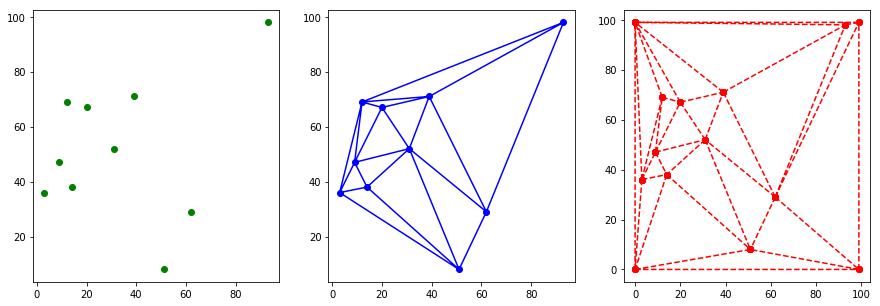

In [43]:
# 随机生成20个点
seed(4)
n = 10
xs = [randint(1, 98) for x in range(n)]
ys = [randint(1, 98) for x in range(n)]
zs = [0 for x in range(n)]

DT = D.Delaunay_Triangulation()
for x, y in zip(xs, ys):
    DT.AddPoint(D.Point(x, y))

XS, YS, TS = DT.export()

# print(XS)
# print(YS)
# print(TS)

"""
Creating and plotting unstructured triangular grids.
"""
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import math

%matplotlib inline

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.plot(xs, ys, 'go')

# Creating a Triangulation without specifying the triangles results in the
# Delaunay triangulation of the points.

# Create the Triangulation; no triangles so Delaunay triangulation created.
triang = tri.Triangulation(xs, ys)

# Plot the triangulation.
plt.subplot(1,3,2)
plt.triplot(triang, 'bo-')

plt.subplot(1,3,3)
plt.triplot(tri.Triangulation(XS, YS, TS), 'ro--')

plt.show()




### 参考资料
* 计算几何笔记 - 知乎  
https://zhuanlan.zhihu.com/c_162517931 
* Delaunay Triangulation - menjiawan的专栏 - CSDN博客  
https://blog.csdn.net/menjiawan/article/details/45073121

### Bowyer-Watson算法

__Bowyer算法__由英国Bath大学的Bowyer在1981年提出。算法首先构造离散点集的的若干离散点的Voronoi图，根据Voronoi领域准则连接临近点，得到初始Delaunay三角剖分，然后逐步加入剖分点，每加入一个点就对已有的Voronoi图进行修改，构造新点集的Voronoi图，直到所有点都插入完毕。
* Computing Dirichlet tessellations1 | The Computer Journal | Oxford Academic  
https://academic.oup.com/comjnl/article/24/2/162/338193

__Watson算法__由澳大利亚悉尼大学Watson在1981年提出。算法采用空外接圆准则，直接从三角剖分入手。算法从初始三角划分开始，每加入一个离散点，找出所有外接圆包含此点的三角形，删除这些三角形面向该插入点的边，得到包含此点的多边形，将此点与多边形的定点连接就构成新的Delaunay三角剖分，重复此过程直至所有点插入完毕为止。注意，此算法当四点或以上共圆时将产生错误。
* Computing the n-dimensional Delaunay tessellation with application to Voronoi polytopes1 | The Computer Journal | Oxford Academic  
https://academic.oup.com/comjnl/article/24/2/167/338200

__Bowyer-Watson算法__是根据上述两者算法相互补充改进得到的(貌似跟Watson算法差不多，具体可以参考上述两篇论文)，仍然是一种插点增量算法的一种。算法逻辑如下：

- 1.求解离散点集的凸包，建立点集凸包边界节点的初始三角形划分；
- 2.选择另外的离散点，插入指定位置，在已有的三角形中找出外接圆包含此点的三角形，并删除公共边，得到一个包含新插入点的多边形；
- 3.将此点与多边形的其他顶点连接起来，构成新的三角形划分；
- 4.重复插点知道所有点插入完毕。
- 5.最后删除超级三角形相关联的三角形即可。


### 判断点在三角形内


<img src="./figures/Trangle.png">

#### 1. 点P和三顶点夹角和360
连接点P和三角形的三个顶点得到三条线段PA，PB和PC，求出这三条线段与三角形各边的夹角，如果所有夹角之和为360度，那么点P在三角形内，否则不在，此法直观，但效率低下。

#### 2. 依次选定三边，点P和另一顶点在同一侧:两个外积同号，那么点在一侧
当选定线段AB时，点C位于AB的右侧，同理选定BC时，点A位于BC的右侧，最后选定CA时，点B位于CA的右侧，所以当选择某一条边时，我们只需验证点P与该边所对的点在同一侧即可。  
如何判断两个点在某条线段的同一侧呢？可以通过叉积来实现，连接BP，将BP和BC做叉积，再将BA和BC做叉积，如果两个叉积的结果方向一致，那么两个点在同一侧。  
BTW，判断两个向量的是否同向可以用点积实现，如果点积大于0，则两向量夹角是锐角，否则是钝角。

#### 3. 利用外积同号和面积关系
首先利用外积方向判断p在角ABC内：将BA和BC做叉积，连接BP，分别将BA和BP、BP和BC做叉积并判断与BA和BC的叉积同向。
最后利用外积大小判断p在三角形ABC内：BA和BP、BP和BC的叉积之和，小于BA和BC的叉积。

### 判断点在三角形的外接圆内

#### 1.先求圆心、半径，比较半径和圆心到点P距离


由三角形的外心坐标公式计算圆心坐标
$$
x=\frac{\left|\begin{array}{lll}{x_{0}^{2}+y_{0}^{2}} & {y_{0}} & {1} \\ {x_{1}^{2}+y_{1}^{2}} & {y_{1}} & {1} \\ {x_{2}^{2}+y_{2}^{2}} & {y_{2}} & {1}\end{array}\right|}{2\left|\begin{array}{ccc}{x_{0}} & {y_{0}} & {1} \\ {x_{1}} & {y_{1}} & {1} \\ {x_{2}} & {y_{2}} & {1}\end{array}\right|} , y=\frac{\left|\begin{array}{lll}{x_{0}} & {x_{0}^{2}+y_{0}^{2}} & {1} \\ {x_{1}} & {x_{1}^{2}+y_{1}^{2}} & {1} \\ {x_{2}} & {x_{2}^{2}+y_{2}^{2}} & {1}\end{array}\right|}{2\left|\begin{array}{ccc}{x_{0}} & {y_{0}} & {1} \\ {x_{1}} & {y_{1}} & {1} \\ {x_{2}} & {y_{2}} & {1}\end{array}\right|}
$$
根据这个外心的坐标公式计算出外接圆的圆心坐标，就能得到圆的半径，从而判断出点P与外接圆的位置关系。

#### 2.利用角度关系
<img src="./figures/P_Trangle.png">
- step1 计算$∠P_0P_1P_2$和$∠P_0PP_2$的大小，两个角的大小在$[0,π]$范围内。  
    - step1.1 如果$∠P_0PP_2=0$，则点$P$不在圆内，结束；如果$∠P_0PP_2 = π$,则点$P$在圆内，结束。   
   
   
- setp2 判断点$P$和$P_1$是否在$P_0P_2$同侧。  
    - step2.1 这里通过判断向量外积$\overrightarrow{P_{1} P_{0}} \times \overrightarrow{P_{1} P_{2}}$与$\overrightarrow{P P_{0}} \times \overrightarrow{P P_{2}}$是否同号，如果同号则在同一侧，否则在两侧。   


- step3 如果点$P$和$P_1$是在$P_0P_2$同一侧，若$\angle P_{0} P_{1} P_{2} \leq \angle P_{0} P P_{2}$,则点$P$在圆内，否则在圆外，结束；如果点$P$和$P_1$是在$P_0P_2$不在侧，若$\angle P_{0} P_{1} P_{2}+\angle P_{0} P P_{2} \geq \pi$，则点$P$在圆内，否则在圆外，结束。


### Delaunay Triangulation & Voronoi Diagram in OpenCV

给定一组点，可以使用openCV中的Subdiv2D类计算Delaunay三角剖分或Voronoi图。

步骤：
- 1.获取关键点列表
> points = []  
> points.append((x, y))
- 2.定义要分区的矩形区间
> img = cv2.imread("image.jpg");
> size = img.shape
> rect = (0, 0, size[1], size[0])
- 3.创建Subdiv2D类的实例
> subdiv  = cv2.Subdiv2D(rect)
- 4.使用subdiv.insert(point)插入点
> for p in points :
>     subdiv.insert(p)
- 5.使用subdiv.getTriangleList方法得到Delaunay三角剖分的三角形列表
> triangleList = subdiv.getTriangleList();
> for t in triangleList :
>     pt1 = (t[0], t[1])
>     pt2 = (t[2], t[3])
>     pt3 = (t[4], t[5])
- 6.使用subdiv.getVoronoiFacetList方法得到Voronoi图形状和中心的列表
> (facets, centers) = subdiv.getVoronoiFacetList([])


In [44]:
import cv2
import numpy as np
import random

# Check if a point is inside a rectangle
def rect_contains(rect, point) :
    if point[0] < rect[0] :
        return False
    elif point[1] < rect[1] :
        return False
    elif point[0] > rect[2] :
        return False
    elif point[1] > rect[3] :
        return False
    return True

# Draw a point
def draw_point(img, p, color ) :
    cv2.circle( img, p, 2, color, cv2.FILLED, cv2.LINE_AA, 0 )

# Draw delaunay triangles
def draw_delaunay(img, subdiv, delaunay_color ) :
    triangleList = subdiv.getTriangleList();
    size = img.shape
    r = (0, 0, size[1], size[0])

    for t in triangleList :
        pt1 = (t[0], t[1])
        pt2 = (t[2], t[3])
        pt3 = (t[4], t[5])
        
        if rect_contains(r, pt1) and rect_contains(r, pt2) and rect_contains(r, pt3) :
            cv2.line(img, pt1, pt2, delaunay_color, 1, cv2.LINE_AA, 0)
            cv2.line(img, pt2, pt3, delaunay_color, 1, cv2.LINE_AA, 0)
            cv2.line(img, pt3, pt1, delaunay_color, 1, cv2.LINE_AA, 0)

# Draw voronoi diagram
def draw_voronoi(img, subdiv) :

    ( facets, centers) = subdiv.getVoronoiFacetList([])

    for i in range(0,len(facets)) :
        ifacet_arr = []
        for f in facets[i] :
            ifacet_arr.append(f)
        
        ifacet = np.array(ifacet_arr, np.int)
        color = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))

        cv2.fillConvexPoly(img, ifacet, color, cv2.LINE_AA, 0);
        ifacets = np.array([ifacet])
        cv2.polylines(img, ifacets, True, (0, 0, 0), 1, cv2.LINE_AA, 0)
        cv2.circle(img, (centers[i][0], centers[i][1]), 3, (0, 0, 0), cv2.FILLED, cv2.LINE_AA, 0)


if __name__ == '__main__':

    # Define window names
    win_delaunay = "Delaunay Triangulation"
    win_voronoi = "Voronoi Diagram"

    # Turn on animation while drawing triangles
    animate = True
    
    # Define colors for drawing.
    delaunay_color = (255,255,255)
    points_color = (0, 0, 255)

    # Read in the image.
    img = cv2.imread("./images/obama.jpg");
    
    # Keep a copy around
    img_orig = img.copy();
    
    # Rectangle to be used with Subdiv2D
    size = img.shape
    rect = (0, 0, size[1], size[0])
    
    # Create an instance of Subdiv2D
    subdiv = cv2.Subdiv2D(rect);

    # Create an array of points.
    points = [];
    
    # Read in the points from a text file
    with open("./images/obama.txt") as file :
        for line in file :
            x, y = line.split()
            points.append((int(x), int(y)))

    # Insert points into subdiv
    for p in points :
        subdiv.insert(p)
        
        # Show animation
        if animate :
            img_copy = img_orig.copy()
            # Draw delaunay triangles
            draw_delaunay( img_copy, subdiv, (255, 255, 255) );
            cv2.imshow(win_delaunay, img_copy)
            cv2.waitKey(100)

    # Draw delaunay triangles
    draw_delaunay( img, subdiv, (255, 255, 255) );

    # Draw points
    for p in points :
        draw_point(img, p, (0,0,255))

    # Allocate space for voronoi Diagram
    img_voronoi = np.zeros(img.shape, dtype = img.dtype)

    # Draw voronoi diagram
    draw_voronoi(img_voronoi,subdiv)

    # Show results
    cv2.imshow(win_delaunay,img)
    cv2.imshow(win_voronoi,img_voronoi)
    cv2.waitKey(0)



### 参考博客
* Facial Landmark Detection | Learn OpenCV  
https://www.learnopencv.com/facial-landmark-detection/
* Delaunay Triangulation and Voronoi Diagram using OpenCV ( C++ / Python ) | Learn OpenCV  
https://www.learnopencv.com/delaunay-triangulation-and-voronoi-diagram-using-opencv-c-python/



## 人脸检测

### OpenCV库
* ### 基于haar特征和adaboost分类器的人脸检测
Haar分类器 = Haar-like特征 + 积分图方法 + AdaBoost +级联；  
Haar分类器算法的要点如下：  
①　使用Haar-like特征做检测。  
②　使用积分图（Integral Image）对Haar-like特征求值进行加速。  
③　使用AdaBoost算法训练区分人脸和非人脸的强分类器。  
④　使用筛选式级联把强分类器级联到一起，提高准确率。  
* ### 基于DNN的人脸检测
在OpenCV3.3版本发布中把DNN模块从扩展模块移到了OpenCV正式发布模块中，OpenCV做了近一步扩展支持所有主流的深度学习框架训练生成与导出模型数据加载。  
openCV人脸检测的实例中，DNN模块支持两个框架的模型：   
若为caffe模型，则使用readNetFromCaffe，需要用到.prototxt格式的配置文件和.caffemodel格式的模型文件；  
若为tensorflow模型，则使用readNetFromTensorflow，需要用到.pbtxt格式的配置文件和.pb格式的模型文件。


### Dlib库
Dlib 是一个十分优秀好用的机器学习库，其源码均由 C++ 实现，并提供了 Python 接口，可广泛适用于很多场景。  
> * dlib C++ Library  
> http://dlib.net/ 

* ### 基于HOG特征和线性分类器的人脸检测
采用经典的HOG(Histogram of Oriented Gradients)特征结合线性分类器、图像金字塔(image pyramid)及滑窗检测机制(sliding window detection scheme)实现的人脸检测器。  
* ### 基于CNN的人脸检测
采用预训练的CNN模型进行图片中的人脸检测。  
基于CNN模型比基于HOG特征模型的人脸检测准确度更高，但是需要更多的计算资源，即在GPU上运行才可有较好的运行速率。
